In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-dataset/Employee.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data

In [3]:
df = pd.read_csv("/kaggle/input/employee-dataset/Employee.csv")

In [4]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df.shape

(4653, 9)

In [6]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


# exploratory data analysis (EDA)

### 1. What is the distribution of educational qualifications among employees?

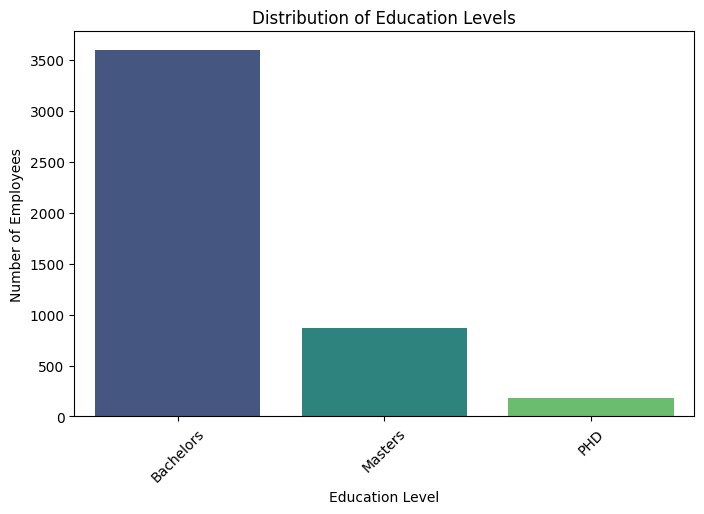

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x='Education', data=df, palette='viridis')
plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

### 2. What is the gender distribution in the company?

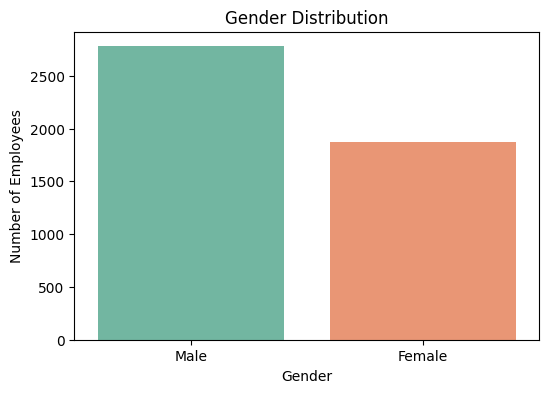

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
plt.show()


### 3. How many employees have ever been benched?

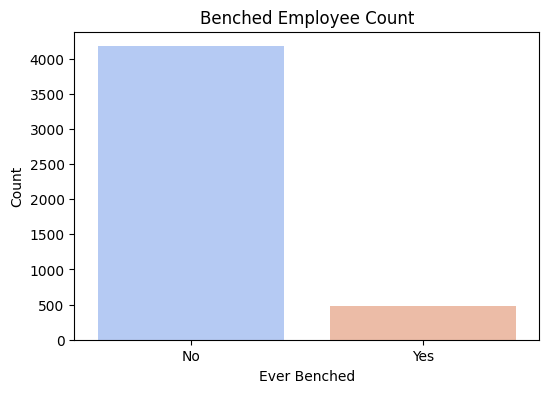

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='EverBenched', data=df, palette='coolwarm')
plt.title("Benched Employee Count")
plt.xlabel("Ever Benched")
plt.ylabel("Count")
plt.show()

###  4. How is the distribution of payment tiers?

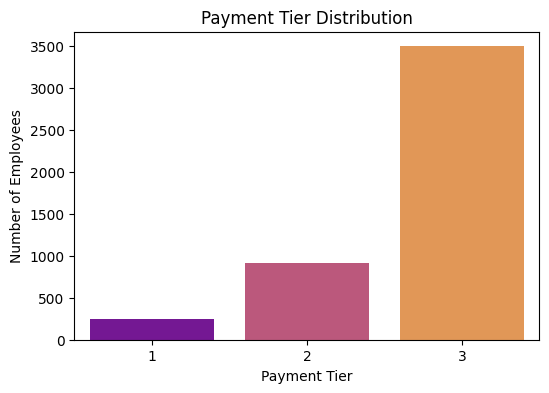

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='PaymentTier', data=df, palette='plasma')
plt.title("Payment Tier Distribution")
plt.xlabel("Payment Tier")
plt.ylabel("Number of Employees")
plt.show()


 ### 5. What is the age distribution of employees?

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


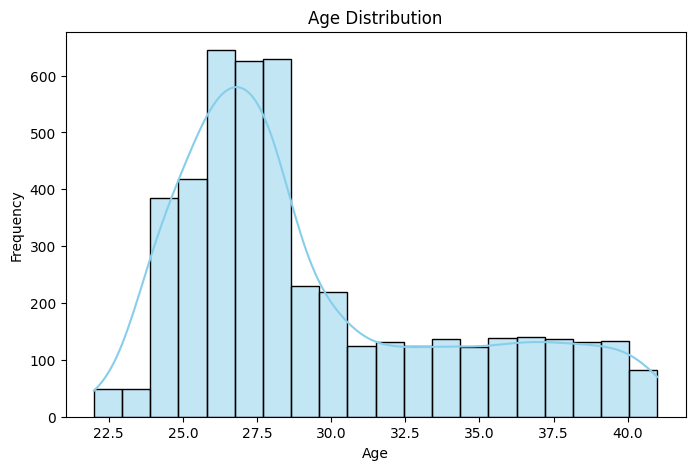

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### 6. What is the experience level in the current domain?

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


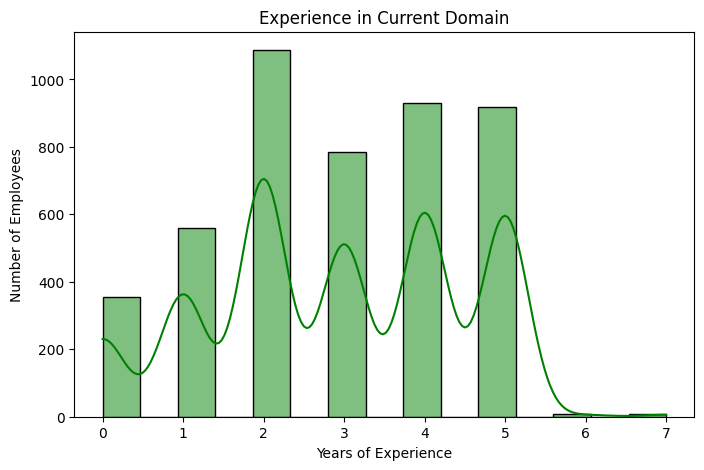

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['ExperienceInCurrentDomain'], bins=15, kde=True, color='green')
plt.title("Experience in Current Domain")
plt.xlabel("Years of Experience")
plt.ylabel("Number of Employees")
plt.show()

### 7. Leave or Not - Target Class Distribution

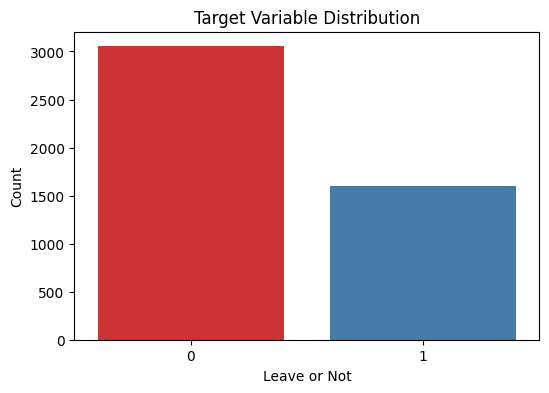

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='LeaveOrNot', data=df, palette='Set1')
plt.title("Target Variable Distribution")
plt.xlabel("Leave or Not")
plt.ylabel("Count")
plt.show()

# Data Preprocessing

In [15]:
df.drop_duplicates(inplace=True)
print(df.isnull().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male/Female → 1/0
df['EverBenched'] = df['EverBenched'].map({'Yes': 1, 'No': 0})


df['City'] = le.fit_transform(df['City'])
df['Education'] = le.fit_transform(df['Education'])


In [17]:
from sklearn.preprocessing import StandardScaler

X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Balancing the Dataset

In [18]:
!pip uninstall -y scikit-learn imbalanced-learn
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0


Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.3.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


print( Counter(y))
print( Counter(y_resampled))

Counter({0: 1676, 1: 1088})
Counter({0: 1676, 1: 1676})


# Model Training

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

In [35]:
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

import pandas as pd
results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.651267,0.658683,0.647059,0.652819
Naive Bayes,0.642325,0.652439,0.629412,0.640719
KNN,0.767511,0.764368,0.782353,0.773256
Decision Tree,0.712370,0.724771,0.697059,0.710645
Random Forest,0.773472,0.788344,0.755882,0.771772
SVM,0.801788,0.841584,0.750000,0.793157


In [36]:
best_model = results_df["F1-Score"].idxmax()
print(f"The best model is: {best_model}")

The best model is: SVM


# Models Evaluation

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluating all models
models = [lr_model, knn_model, rf_model, svm_model]
model_names = ["Logistic Regression", "KNN", "Random Forest", "SVM"]

metrics = {}
for model, name in zip(models, model_names):
    metrics[name] = evaluate_model(model, X_test, y_test)

# Displaying the metrics
import pandas as pd

metrics_df = pd.DataFrame(metrics, index=["Accuracy", "Precision", "Recall", "F1-Score"])
metrics_df


,Logistic Regression,KNN,Random Forest,SVM
Accuracy,0.651267,0.767511,0.776453,0.801788
Precision,0.658683,0.764368,0.791411,0.841584
Recall,0.647059,0.782353,0.758824,0.750000
F1-Score,0.652819,0.773256,0.774775,0.793157


# Best Model: Confusion Matrix & Classification Report

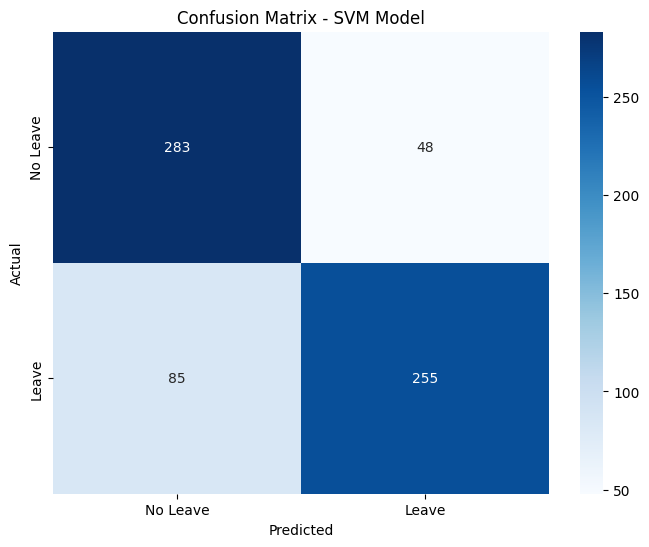

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       331
           1       0.84      0.75      0.79       340

    accuracy                           0.80       671
   macro avg       0.81      0.80      0.80       671
weighted avg       0.81      0.80      0.80       671



In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for SVM
y_pred_svm = svm_model.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Leave", "Leave"], yticklabels=["No Leave", "Leave"])
plt.title("Confusion Matrix - SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


# Hyperparameter Tuning for SVM

In [33]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for SVM: ", grid_search.best_params_)

# Best model from grid search
best_svm_model = grid_search.best_estimator_

# Evaluate the best SVM model
y_pred_best_svm = best_svm_model.predict(X_test)
print(classification_report(y_test, y_pred_best_svm))


Best Parameters for SVM:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       331
           1       0.84      0.78      0.81       340

    accuracy                           0.81       671
   macro avg       0.81      0.81      0.81       671
weighted avg       0.81      0.81      0.81       671

